<a href="https://colab.research.google.com/github/pepean89/03MIAR---Algoritmos-de-Optimizacion---2021/blob/main/03MIAR_Trabajo_Practico_Jose_Andres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Trabajo Final<br>

Nombre y Apellidos: José Andrés Ramírez  <br>
Url: https://github.com/pepean89/03MIAR---Algoritmos-de-Optimizacion---2021/blob/main/Algoritmos_TrabajoPractico_JoseAndres.ipynb<br>
Problema:

>2. Organizar los horarios de partidos de La Liga<br>

__Descripción del problema:__

* Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la audiencia.

* Los horarios disponibles se conocen a priori.

* En primer lugar se clasifican los equipos en tres categorías según el numero de seguidores( que tiene relación directa con la audiencia). Hay 3 equipos en la categoría A, 11 equipos de categoría B y 6 equipos de categoría C.

* Se conoce estadisticamente la audiencia que genera cada partido según los equipos que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos)

* Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce según unos coeficientes conocidos.

* Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes.

* Es posible la coincidencia de horarios pero en este caso la audiencia de cada partido se verá afectada y se estima que se reduce en porcentaje conocido dependiendo del número de coincidencias.

(*) La respuesta es obligatoria

In [1]:
# Vamos a importar antes de empezar las librerías necesarias para ejecutar el cuaderno:

import numpy as np
import pandas as pd
from random import shuffle, choice
from itertools import product

## __Pregunta 1__

* (*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?

* ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.

___Respuesta:___

En este problema, la restricción que se impone es que siempre debe de haber asignados al menos un partido al horario de viernes 20h (V20) y otro al horario de lunes 20h (L20). 

En el caso de explorar las posibilidades sin contar con las restricciones, nos encontramos en un problema de variación con repetición, en el que de un conjunto de $n=10$ elementos (horarios), debemos tomar $k=10$ opciones (partidos), considerando que cada horario se puede elegir libremente en más de una ocasión y el orden de elección sí importa. La fórmula que cuenta el numero de opciones es:

$$
VR_{n,k} = n^k
$$

Así, el número de posibilidades ___SIN___ restricciones es de __10.000.000.000__.

Ahora, si tuviéramos en cuenta las restricciones, deberíamos considerar que un cierto número de las variaciones generadas no contarán con los horarios del viernes 20h (V20) o lunes 20h (L20). En particular, la situación se podría representar gráficamente como sigue:

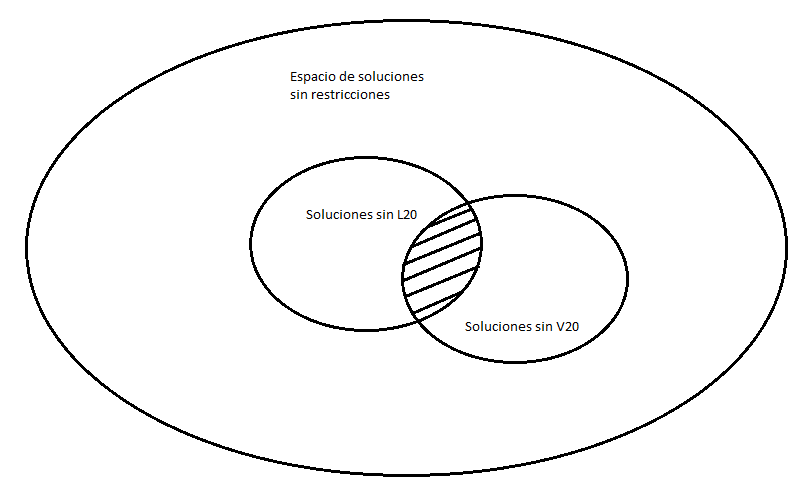

Para el cálculo de variaciones con las restricciones del problema habría que deducir el equivalente a retirar del conjunto de horarios, por una parte 'V20', y por otra parte 'L20'. Dicho de otro modo, al número total de variaciones con repetición, se le restaría 2 veces el número de variaciones con repetición con $n'=n-1$ y $k=10$. Además, habría que mantener en la cuenta de soluciones válidas la intersección entre los dos conjuntos anteriores, calculada como el número de variaciones con repetición con $n''=n'-1=n-2$ y $k=10$. Esto es: 

$$
Soluciones = n^k - 2(n-1)^k + (n-2)^k
$$

El número de posibilidades considerando las restricciones es de __4.100.173.022__.

## __Pregunta 2__

Modelo para el espacio de soluciones:
* (*) ¿Cuál es la estructura de datos que mejor se adapta al problema? Arguméntalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguméntalo)

___Respuesta:___

In [2]:
# Tabulamos los datos referentes a los equipos individuales, para continuar haciendo una asignación aleatoria y generar los 10 partidos:

datos_equipos = {'Celta':'B', 'Real Madrid':'A', 'Valencia':'B', 'Real Sociedad':'A', 'Mallorca':'C', 'Eibar':'C', 'Athletic Bilbao':'B', 'Barcelona':'A'
           , 'Leganés':'C', 'Osasuna':'C', 'Villareal':'B', 'Granada':'C', 'Alavés':'B', 'Levante':'B', 'Espanyol':'B', 'Sevilla':'B'
           , 'Betis':'B', 'Valladolid':'C', 'Atlético de Madrid':'B', 'Getafe':'B'}

equipos = list(datos_equipos.keys())
categorias = list(datos_equipos.values())

shuffle(equipos)
partidos = [[equipos[2*x],equipos[2*x + 1]] for x in range(10)]
categoria = [[datos_equipos[partidos[i][0]],datos_equipos[partidos[i][1]]] for i, partido in enumerate(partidos)]


pd_datos = pd.DataFrame([partidos,categoria], index=['Partido', 'Categoria']).T
pd_datos['Audiencia base'] = np.nan
pd_datos['Horario'] = np.nan
pd_datos['Ponderacion'] = np.nan
pd_datos['Partidos simultaneos'] = np.nan
pd_datos['F coincidencia'] = np.nan
pd_datos['Audiencia estimada'] = np.nan

In [3]:
display(pd_datos)

,Partido,Categoria,Audiencia base,Horario,Ponderacion,Partidos simultaneos,F coincidencia,Audiencia estimada
0,"[Atlético de Madrid, Barcelona]","[B, A]",NaN,NaN,NaN,NaN,NaN,NaN
1,"[Eibar, Valencia]","[C, B]",NaN,NaN,NaN,NaN,NaN,NaN
2,"[Leganés, Real Sociedad]","[C, A]",NaN,NaN,NaN,NaN,NaN,NaN
3,"[Betis, Getafe]","[B, B]",NaN,NaN,NaN,NaN,NaN,NaN
4,"[Espanyol, Sevilla]","[B, B]",NaN,NaN,NaN,NaN,NaN,NaN
5,"[Villareal, Mallorca]","[B, C]",NaN,NaN,NaN,NaN,NaN,NaN
6,"[Alavés, Osasuna]","[B, C]",NaN,NaN,NaN,NaN,NaN,NaN
7,"[Levante, Real Madrid]","[B, A]",NaN,NaN,NaN,NaN,NaN,NaN
8,"[Valladolid, Celta]","[C, B]",NaN,NaN,NaN,NaN,NaN,NaN
9,"[Athletic Bilbao, Granada]","[B, C]",NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Ahora creamos una matriz con la audiencia estimada según la categoría del partido:

audiencia = [2, 1.3, 1, 1.3, 0.9, 0.75, 1, 0.75, 0.47]
audiencia = np.array(audiencia).reshape(3,3)
audiencia = pd.DataFrame(audiencia, columns=['A','B','C'], index=['A','B','C'])

In [5]:
display(audiencia)

,A,B,C
A,2.0,1.30,1.00
B,1.3,0.90,0.75
C,1.0,0.75,0.47


In [6]:
# Complementamos los datos generales tabulados con la información de esta matriz de audiencias:

for i in range(10):
    cat_part = pd_datos.iloc[i,1]
    pd_datos.iloc[i,2] = audiencia.loc[cat_part[0], cat_part[1]]

In [7]:
display(pd_datos)

,Partido,Categoria,Audiencia base,Horario,Ponderacion,Partidos simultaneos,F coincidencia,Audiencia estimada
0,"[Atlético de Madrid, Barcelona]","[B, A]",1.30,NaN,NaN,NaN,NaN,NaN
1,"[Eibar, Valencia]","[C, B]",0.75,NaN,NaN,NaN,NaN,NaN
2,"[Leganés, Real Sociedad]","[C, A]",1.00,NaN,NaN,NaN,NaN,NaN
3,"[Betis, Getafe]","[B, B]",0.90,NaN,NaN,NaN,NaN,NaN
4,"[Espanyol, Sevilla]","[B, B]",0.90,NaN,NaN,NaN,NaN,NaN
5,"[Villareal, Mallorca]","[B, C]",0.75,NaN,NaN,NaN,NaN,NaN
6,"[Alavés, Osasuna]","[B, C]",0.75,NaN,NaN,NaN,NaN,NaN
7,"[Levante, Real Madrid]","[B, A]",1.30,NaN,NaN,NaN,NaN,NaN
8,"[Valladolid, Celta]","[C, B]",0.75,NaN,NaN,NaN,NaN,NaN
9,"[Athletic Bilbao, Granada]","[B, C]",0.75,NaN,NaN,NaN,NaN,NaN


In [8]:
# Una vez configurada la tabla de datos general, y dada la jornada sobre la que debemos repartir horarios,
# el atributo "Audiencia base" es suficiente para representar dicha jornada.
# Utilizaremos una lista con los datos de esta columna como argumento de entrada de nuestro problema:

jornada = list(pd_datos['Audiencia base'])

In [9]:
print(jornada)

[1.3, 0.75, 1.0, 0.9, 0.9, 0.75, 0.75, 1.3, 0.75, 0.75]


In [10]:
# Asimismo, vamos a necesitar un vector de entrada (en forma de lista) que sean todos los horarios disponibles:

horarios = ['V20', 'L20', 'S12', 'S16', 'S18', 'S20', 'D12', 'D16', 'D18', 'D20']

In [11]:
print(horarios)

['V20', 'L20', 'S12', 'S16', 'S18', 'S20', 'D12', 'D16', 'D18', 'D20']


In [12]:
# Por otra parte, podemos de estructurar un diccionario que relacione los horarios con los coeficientes correctores:

horarios_dic = {'V20':0.4, 'S12':0.55, 'S16':0.7, 'S18':0.8, 'S20':1, 'D12':0.45, 'D16':0.75, 'D18':0.85, 'D20':1, 'L20':0.4}

In [13]:
print(horarios_dic)

{'V20': 0.4, 'S12': 0.55, 'S16': 0.7, 'S18': 0.8, 'S20': 1, 'D12': 0.45, 'D16': 0.75, 'D18': 0.85, 'D20': 1, 'L20': 0.4}


In [14]:
# Por último, creamos otro diccionario, relaccionando la cantidad de partidos
# que se juegan en un mismo horario con su correspondiente reducción de audiencia por partido:

simul_dic = {1:1, 2:0.75, 3:0.55, 4:0.4, 5:0.3, 6:0.25, 7:0.22, 8:0.2, 9:0.2}

In [15]:
print(simul_dic)

{1: 1, 2: 0.75, 3: 0.55, 4: 0.4, 5: 0.3, 6: 0.25, 7: 0.22, 8: 0.2, 9: 0.2}


Una vez encontrada la mejor solución, habremos guardado los datos asociados a dicha solución, y podremos incluirlos en la tabulación, presentando así todos los datos de forma compacta y fácilmente comprensible.

## __Pregunta 3__

Según el modelo para el espacio de soluciones:
* (*)¿Cual es la función objetivo?

* (*)¿Es un problema de maximización o minimización?

___Respuesta:___

Una solución al problema vendrá dada por la asignaciónde un horario a cada uno de los 10 partidos (que tendrán intrínsecamente asociados una categoría). Para una jornada predefinida, una solución se podría expresar como una lista de 10 entradas, siendo cada una de esas entradas un horario. Por ejemplo:

In [16]:
solucion_ejemplo = ['V20', 'L20', 'S20', 'S12', 'D12', 'S12', 'V20', 'D20', 'D18', 'S16']

Cada una de las entradas podrá ser un _string_, compuesto por una letra que identifica el día de la semana y un número identificando la hora en que se juega el partido. La primera entrada corresponde al horario del primer partido, y así sucesivamente. Hay que notar que al menos una entrada de la lista deberá ser 'V20', y otra 'L20', tal como expresan las restricciones del problema. 

En este problema, la función objetivo será la suma de la audiencia estimada para cada partido, después de haber aplicado los factores correctores por coincidencia de horarios. La función se podría escribir como sigue:

$i: \text{partido}$

$Ab_i: \text{Audiencia base del partido, en función de su categoría}$

$Fh_i: \text{Factor de ponderación según el horario del partido}$

$Fc_i: \text{Factor corrector según el número de partidos jugados en el horario en que se juega el partido i}$

$$
F = \sum_{n=1}^{10} (Ab_i · Fh_i · Fc_i)
$$

Por tanto, éste consiste en un problema de __maximizar__ la salida de la función objetivo.

## __Pregunta 4__

Diseña un algoritmo para resolver el problema por fuerza bruta

___Respuesta:___

La secuencia que ha de seguir este algoritmo es:

   1. Generar todas las combinaciones posibles de horarios, sin atender las restricciones.
   2. Eliminar las potenciales soluciones que no cumplen con las restricciones del problema. 
   3. Dada una jornada de liga, evaluar cada solución (combinación de horarios).
   4. Encontrar la combinación que ha generado una mayor audiencia total (máximo de la función objetivo).

In [17]:
### Generación y filtrado de todo el espacio de soluciones ###

In [18]:
def genera_soluciones(horarios, n_partidos):
    
    # Las entradas de la función son:
        # horarios: Una lista con todos los posibles horarios, que han de incluir 'V20' y 'L20'
        # n_partidos: número de partidos que se disputan en una jornada
        
    # Además, la función informa del número total de soluciones potenciales, sin considerar y considerando restricciones.
        
    # Generación de todas las combinaciones
    sol_sr = list(product(horarios, repeat=n_partidos)) # La función product de la librería itertools genera todas las variaciones con repetición de un conjunto
    print(f'El numero total de soluciones potenciales, sin considerar restricciones es {len(sol_sr)}.')
    
    # Seleccionamos las soluciones válidas a partir de la lista de soluciones anterior
    sol_cr = [list(solucion) for solucion in sol_sr if (('V20' in solucion) and ('L20' in solucion))]
    print(f'El numero total de soluciones potenciales, considerando las restricciones es {len(sol_cr)}.')
    
    # Devolvemos la lista de listas con todas las potenciales soluciones, considerando las restricciones del problema
    return sol_cr

In [19]:
### Evaluación de las combinaciones ###

In [20]:
# Función que asocia a cada horario (entrada de la potencial solución) su factor de ponderación

def pondera_horario(solucion, dic_pesos):

    n = len(solucion)
    pesos_h = [dic_pesos[solucion[i]] for i in range(n)]
    
    return pesos_h

In [21]:
# Función que, para cada potencial solución, cuenta la frecuencia absoluta asociada a cada horario
# De este modo, conoceremos cuántos partidos coinciden en el mismo horario

def cuenta_partidos(solucion):
    
    conteo = [solucion.count(horario) for horario in solucion]
    
    return conteo

In [22]:
# Función que, a partir del vector/lista de frecuencias absolutas, recupera el factor corrector por coincidencia de partidos

def factor_corrector(frecuencias, dic_factor):
    
    n = len(frecuencias)
    factor_c = [dic_factor[frecuencias[i]] for i in range(n)]
    
    return factor_c

In [23]:
# Función que calcula la audiencia estimada para cada partido de una potencial solución

def audiencia_solucion(aud_base, pesos, f_corrector):
    
    aud_partidos = [x*y*z for x,y,z in zip(aud_base, pesos, f_corrector)]
    audiencia_est = np.sum(aud_partidos)
    
    return audiencia_est

In [24]:
# Función que integra a las cuatro funciones anteriores, y devuelve un vector/lista con el resultado de evaluar
# la función objetivo para cada solución potencial

def evalua_FB(aud_base, soluciones, dic_pesos, dic_factor):
    
    n_sol = len(soluciones)
    n_jornada = len(aud_base)
    audiencias = []
    
    for solucion in soluciones:
        
        pesos = pondera_horario(solucion, dic_pesos)
        conteo = cuenta_partidos(solucion)
        f_corrector = factor_corrector(conteo, dic_factor)
        aud_sol = audiencia_solucion(aud_base, pesos, f_corrector)
        audiencias.append(aud_sol)
    
    audiencia_max = np.max(audiencias)
    
    return audiencias, audiencia_max

In [25]:
### Búsqueda de la combinación con audiencia máxima ### ---> En la función anterior!

In [26]:
### Integración del algoritmo completo (fuerza bruta) ###

In [27]:
def resuelve_FB(aud_base, horarios, dic_pesos, dic_factor):
    
    soluciones = genera_soluciones(horarios, len(aud_base))
    audiencias, audiencia_max = evalua_FB(aud_base, soluciones, dic_pesos, dic_factor)
    indice_sol = audiencias.index(audiencia_max)
    solucion = soluciones[indice_sol]
    
    print(f'\nLa solución que genera una audiencia máxima ({round(audiencia_max, 3)} M) es:')
    
    return solucion

In [28]:
### Probamos el algoritmo con datos que representan una reducción del espacio de soluciones ###

In [29]:
# Datos de prueba del algoritmo:

horarios_prueba = horarios[:8]
jornada_prueba = jornada[:8]
horarios_dic = {'V20':0.4, 'S12':0.55, 'S16':0.7, 'S18':0.8, 'S20':1, 'D12':0.45, 'D16':0.75, 'D18':0.85, 'D20':1, 'L20':0.4}
simul_dic = {1:1, 2:0.75, 3:0.55, 4:0.4, 5:0.3, 6:0.25, 7:0.22, 8:0.2, 9:0.2}

In [30]:
resuelve_FB(jornada_prueba, horarios_prueba, horarios_dic, simul_dic)

El numero total de soluciones potenciales, sin considerar restricciones es 16777216.
El numero total de soluciones potenciales, considerando las restricciones es 6927230.

La solución que genera una audiencia máxima (5.152 M) es:


['S18', 'V20', 'D16', 'S12', 'S16', 'L20', 'D12', 'S20']

## __Pregunta 5__

Calcula la complejidad del algoritmo por fuerza bruta

Vamos descomponiendo la complejidad computacional de cada parte/función del algoritmo que resuelve el problema por fuerza bruta:

La dimensionalidad del problema viene definida por:

- n: número de partidos (10)
- m: número de horarios disponibles (10)

In [32]:
def genera_soluciones(horarios, n_partidos):
    
    sol_sr = list(product(horarios, repeat=n_partidos))               # 2^n  
    print(f'El numero total de soluciones potenciales, sin considerar restricciones es {len(sol_sr)}.')        # 1    
    sol_cr = [list(solucion) for solucion in sol_sr if (('V20' in solucion) and ('L20' in solucion))]          # 2^n   
    print(f'El numero total de soluciones potenciales, considerando las restricciones es {len(sol_cr)}.')      # 1  
    return sol_cr                         # 1
    
## Orden de complejidad computacional de la función genera_soluciones: O(2^n) ##

In [33]:
def pondera_horario(solucion, dic_pesos):

    n = len(solucion)                                             # 1
    pesos_h = [dic_pesos[solucion[i]] for i in range(n)]          #  n   
    return pesos_h                                                # 1
    
## Orden de complejidad computacional de la función pondera_horario: O(n) ##

In [34]:
def cuenta_partidos(solucion):
    
    conteo = [solucion.count(horario) for horario in solucion]            # n^2
    #(el método .count() supone recorrer un vector de dimensión n, aplicar n comparaciones y guardar hasta n resultados)    
    return conteo                                                         # 1
    
## Orden de complejidad computacional de la función pondera_horario: O(n^2) ##

In [35]:
def factor_corrector(frecuencias, dic_factor):
    
    n = len(frecuencias)                                                # 1
    factor_c = [dic_factor[frecuencias[i]] for i in range(n)]           # n
    return factor_c                                                     # 1
    
## Orden de complejidad computacional de la función pondera_horario: O(n) ##

In [36]:
def audiencia_solucion(aud_base, pesos, f_corrector):
    
    aud_partidos = [x*y*z for x,y,z in zip(aud_base, pesos, f_corrector)]          # n
    audiencia_est = np.sum(aud_partidos)                                           # n   
    return audiencia_est                                                           # 1
    
## Orden de complejidad computacional de la función pondera_horario: O(n) ##

In [37]:
def evalua_FB(aud_base, soluciones, dic_pesos, dic_factor):
    
    n_sol = len(soluciones)                 # 1
    n_jornada = len(aud_base)               # 1
    audiencias = []                         # 1
    
    for solucion in soluciones:                                         # n
        
        pesos = pondera_horario(solucion, dic_pesos)                    # n^2
        conteo = cuenta_partidos(solucion)                              # n^3
        f_corrector = factor_corrector(conteo, dic_factor)              # n^2
        aud_sol = audiencia_solucion(aud_base, pesos, f_corrector)      # n^2
        audiencias.append(aud_sol)                                      # n
    
    audiencia_max = np.max(audiencias)            # n   
    return audiencias, audiencia_max              # 1
    
## Orden de complejidad computacional de la función pondera_horario: O(n^3) ##

In [38]:
def resuelve_FB(aud_base, horarios, dic_pesos, dic_factor):
    
    soluciones = genera_soluciones(horarios_prueba, len(aud_base))                                # 2^n
    audiencias, audiencia_max = evalua_FB(aud_base, soluciones, dic_pesos, dic_factor)            # (2^n)^3
    indice_sol = audiencias.index(audiencia_max)                                                  # 2^n
    solucion = soluciones[indice_sol]                                                             # 1   
    print(f'\nLa solución que genera una audiencia máxima ({round(audiencia_max, 3)} M) es:')     # 1 
    return solucion                                                                               # 1
    
## Orden de complejidad computacional del algoritmo es: O(2^n) ##

El orden de complejidad del algoritmo de fuerza bruta viene condicionado por la generación y filtrado de todas las posibles soluciones, con un orden de complejidad exponencial, O(2^n). Cualquier otra función considerada a posteriori, que evalua las soluciones o determina los coeficientes necesarios para realizar esta evaluación, tienen una complejidad lineal o polinómica. Por lo tanto, el algoritmo de fuerza bruta tiene un ___orden de complejidad exponencial, O(2^n)___.

## __Pregunta 6__

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

___Respuesta:___

Se plantea un algoritmo genético para la exploración de soluciones al problema. Este algoritmo va a eliminar la necesidad de desarrollar y evaluar todo el conjunto de soluciones, que es el paso que resulta prohibitivo al considerar la fuerza bruta. El algoritmo se diseña con la siguiente estructura:

1. Se generan aleatoriamente n soluciones, que constituirán la primera generación.
2. Se aplica una función de factibilidad, que asegurará el cumplimiento de las restricciones del problema. Esta misma función, aplicará las mutaciones necesarias a los individuos para que se satisfagan las restricciones. Así, la función de factibilidad cumplirá la doble función de asegurar soluciones coherentes con el problema e introducirá mutaciones en los individuos de cada nueva generación.
3. Mezcla aleatoria de los individuos (_shuffle_).
4. Los emparejamientos se harán de forma ordenada (el 1º con el 2º, el 3º con el 4º, ...), una vez aplicada la función _shuffle_ a la población.
5. Para el cruce, consideraremos un 3-point crossover, eligiendo los puntos de forma aleatoria.
6. Al nuevo conjunto de soluciones generado se le aplicará la función de factibilidad/mutación.
7. Se aplica la función fitness (que calculará la audiencia estimada para cada solución) simultáneamente a la generación de progenitores y a la generación de hijos.
8. Se seleccionarán individuos para conformar la siguiente generación como sigue:
  - Aquellos individuos que tienen una valoración superior al percencil 50 pasan a formar la siguiente generación.
  - De entre los no seleccionados, se escogen individuos aleatoriamente hasta completar una nueva generación de tamaño n (tamaño de la primera generación).
9. Se vuelve al punto 3.

In [39]:
### 1. Primera generación ###

In [40]:
def primera_gen(horarios, n, jornada):
    
    # n: número de soluciones/individuos de primera generación
    # horarios: conjunto de posibles horarios
    
    size = len(jornada) # Representa la longitud de cada solución (número de partidos a los que asignar horario)
    poblacion = []
    
    for i in range(n):       
        individuo = []
        n_horarios = 0
        
        while n_horarios < size:           
            individuo.append(choice(horarios))
            n_horarios += 1
            
        poblacion.append(individuo)
    
    return poblacion

In [41]:
### 2. Función de factibilidad/mutación ###

In [42]:
def fact_mut(generacion):
    
    n = len(generacion) # total de individuos en la población
    n_i = len(generacion[0][:]) # longitud de una solucion
    
    for i in range(n):

        if 'V20' not in generacion[i]:      
            index = np.random.randint(0, n_i)
            if generacion[i][index] != 'L20':
                generacion[i][index] = 'V20'
            
        if 'L20' not in generacion[i]:      
            index = np.random.randint(0, n_i)
            if generacion[i][index] != 'V20':
                generacion[i][index] = 'L20'
                
    return generacion

In [43]:
### 3. Mezcla aleatoria de los individuos de la población ###

In [44]:
# shuffle(generacion) es la función integrada en el algoritmo. 

In [45]:
### 4. Función de cruce, que incluye la comprobación de factibilidad/mutación ###

In [46]:
def cruce_gen(generacion):
    
    n = len(generacion)
    nueva_gen = [] # aquí almacenaremos los hijos de cada cruce
    
    for i in range(int(n/2)):
        
        solucion_p = generacion[2*i]
        solucion_m = generacion[2*i + 1]
        
        solucion_h = []

        # proceso de elección de los 3 crossover points (se generan nuevos puntos para cada par de progenitores)
        opciones = list(range(1,len(solucion_p)-1)) # indices candidatos a ser un crossover point (excluye índices 0 y 9)
        conteo = 0
        indices = [] # en esta lista almacenamos los crossover points

        while conteo < 3:
            indice = choice(range(len(opciones)))
            indices.append(opciones.pop(indice))
            conteo += 1

        indices.sort()
    
        # proceso de cruce:
        solucion_h.extend(solucion_p[:indices[0]])
        solucion_h.extend(solucion_m[indices[0]:indices[1]])
        solucion_h.extend(solucion_p[indices[1]:indices[2]])
        solucion_h.extend(solucion_m[indices[2]:])
    
        # se guarda la solución generada:
        nueva_gen.append(solucion_h)
        
    # filtramos los hijos con la función de factibilidad, aplicando las mutaciones donde se requiran:
    nueva_gen = fact_mut(nueva_gen)
                
    return nueva_gen   

In [47]:
### 5. Función de fitness, aplicada a las generaciones de progenitores e hijos ### 

In [48]:
def f_fitness(generacion, generacion_h, jornada, dic_pesos, dic_factor):
    
    generacion += generacion_h
    n_sol = len(generacion[0])
    n_jornada = len(jornada)
    audiencias = []

    for individuo in generacion:

        pesos = pondera_horario(individuo, dic_pesos) # función definida en el ejercicio 4
        conteo = cuenta_partidos(individuo) # función definida en el ejercicio 4
        f_corrector = factor_corrector(conteo, dic_factor) # función definida en el ejercicio 4
        aud_sol = audiencia_solucion(jornada, pesos, f_corrector) # función definida en el ejercicio 4
        audiencias.append(aud_sol)
    
    return audiencias

In [49]:
### 6. Función de selección ###

In [50]:
def f_seleccion(lista_audiencias, generacion, generacion_h):

    audiencias = np.array(lista_audiencias)
    threshold = np.percentile(audiencias, 50)
    lista_combinada = list(zip(generacion+generacion_h, lista_audiencias))

    nueva_generacion = [lista_combinada[i][0] for i in range(len(lista_combinada)) if lista_combinada[i][1] > threshold]

    n = (2/3)*len(lista_combinada)

    while len(nueva_generacion) < n:

        individuo = choice(generacion+generacion_h)
        if individuo not in nueva_generacion:
            nueva_generacion.append(individuo)

    return nueva_generacion

In [51]:
### 7. Algoritmo genético integrado ###

In [52]:
def resuelve_jornada_AG(iteraciones, size_poblacion, horarios, jornada, dic_pesos, dic_factor):
    
    # Comenzamos generando la primera población de soluciones:
    generacion_0 = primera_gen(horarios, size_poblacion, jornada)

    # Filtramos con la función de factibilidad, y aplicamos las mutaciones necesarias
    # para cumplir con las restricciones del problema:
    generacion_0 = fact_mut(generacion_0)
    
    # Iniciamos el bucle:
    contador = 0
    
    while contador < iteraciones:
    
        # Mezclamos los individuos de esta primera generación (generación de progenitores):
        shuffle(generacion_0)       
        # Cruzamos los individuos de esta generación para producir las soluciones hijo:
        generacion_1 = cruce_gen(generacion_0)       
        # Evaluamos el conjunto total de soluciones hasta el momento:
        audiencias = f_fitness(generacion_0, generacion_1, jornada, dic_pesos, dic_factor)       
        # Seleccionamos a la próxima generación:
        generacion_0 = f_seleccion(audiencias, generacion_0, generacion_1)
        
        contador += 1
          
    # De entre las valoraciones/audiencias obtenidas para la última generación,
    # , buscamos el valor de audiencia máxima y la solución a la que corresponde:
    max_audiencia = np.max(audiencias)
    indice_max = audiencias.index(max_audiencia)
    mejor_solucion = generacion_0[indice_max]
    
    print(f'La mejor solución corresponde al conjunto {mejor_solucion}, a la que se estima una audiencia de {round(max_audiencia, 3)} M.')    

    return mejor_solucion, max_audiencia

## __Pregunta 7__

(*)Calcula la complejidad del algoritmo 

___Respuesta:___

Definimos las variables que dimensionan el problema al considerar este algoritmo:

- número de partidos: n
- horarios disponibles: m
- tamaño de la población/generación: p
- número de iteraciones/generaciones: g

In [53]:
def primera_gen(horarios, n, jornada):
    
    size = len(jornada)     # 1
    poblacion = []          # 1
    
    for i in range(n):      # p
        individuo = []      # p
        n_horarios = 0      # p
        
        while n_horarios < size:                  # p*n
            individuo.append(choice(horarios))    # p*n
            n_horarios += 1                       # p*n
            
        poblacion.append(individuo)       # p
    
    return poblacion        # 1
    
    
## Orden de complejidad computacional de la función: O(n) respecto al número de partidos, O(p) respecto al tamaño de la población ##

In [54]:
def fact_mut(generacion):
    
    n = len(generacion)            # 1
    n_i = len(generacion[0][:])    # 1
    
    for i in range(n):                              # p

        if 'V20' not in generacion[i]:              # p
            index = np.random.randint(0, n_i)       # p
            if generacion[i][index] != 'L20':       # p
                generacion[i][index] = 'V20'        # p
            
        if 'L20' not in generacion[i]:              # p
            index = np.random.randint(0, n_i)       # p
            if generacion[i][index] != 'V20':       # p
                generacion[i][index] = 'L20'        # p
                
    return generacion              # 1
    
## Orden de complejidad computacional de la función: O(p) ##

In [55]:
def cruce_gen(generacion):
    
    n = len(generacion)       # 1
    nueva_gen = []            # 1
    
    for i in range(int(n/2)):                                     # (1/2)*p --> p
        
        solucion_p = generacion[2*i]                              # p
        solucion_m = generacion[2*i + 1]                          # p
        solucion_h = []                                           # p
        opciones = list(range(1,len(solucion_p)-1))               # p
        conteo = 0                                                # p
        indices = []                                              # p

        while conteo < 3:                                         # 1
            indice = choice(range(len(opciones)))                 # 1
            indices.append(opciones.pop(indice))                  # 1
            conteo += 1                                           # 1

        indices.sort()                                            # p 
        solucion_h.extend(solucion_p[:indices[0]])                # p
        solucion_h.extend(solucion_m[indices[0]:indices[1]])      # p
        solucion_h.extend(solucion_p[indices[1]:indices[2]])      # p
        solucion_h.extend(solucion_m[indices[2]:])                # p  
        nueva_gen.append(solucion_h)                              # p
        
    nueva_gen = fact_mut(nueva_gen)                           # p
                
    return nueva_gen          # 1
    
## Orden de complejidad computacional de la función: O(p) ##

In [56]:
def f_fitness(generacion, generacion_h, jornada, dic_pesos, dic_factor):
    
    generacion += generacion_h      # 1
    n_sol = len(generacion[0])      # 1
    n_jornada = len(jornada)        # 1
    audiencias = []                 # 1

    for individuo in generacion:                                      # 1.5*p --> p

        pesos = pondera_horario(individuo, dic_pesos)                 # p*n
        conteo = cuenta_partidos(individuo)                           # p*(n^2)
        f_corrector = factor_corrector(conteo, dic_factor)            # p*n
        aud_sol = audiencia_solucion(jornada, pesos, f_corrector)     # p*n
        audiencias.append(aud_sol)                                    # p
        
    return audiencias               # 1
    
## Orden de complejidad computacional de la función: O(n^2) respecto al número de partidos, O(p) respecto al tamaño de la población ##

In [57]:
def f_seleccion(lista_audiencias, generacion, generacion_h):

    audiencias = np.array(lista_audiencias)                                   # 1
    threshold = np.percentile(audiencias, 50)                                 # p^2
    lista_combinada = list(zip(generacion+generacion_h, lista_audiencias))    # 1
    nueva_generacion = [lista_combinada[i][0] for i in range(len(lista_combinada)) if lista_combinada[i][1] > threshold]    # (1.5)*p --> p
    n = (2/3)*len(lista_combinada)                                            # 1

    while len(nueva_generacion) < n:                   # (1/4)*p --> p

        individuo = choice(generacion+generacion_h)    # p
        if individuo not in nueva_generacion:          # p
            nueva_generacion.append(individuo)         # p

    return nueva_generacion                                                   # 1
    
## Orden de complejidad computacional de la función: O(p^2) ##

In [58]:
def resuelve_jornada_AG(iteraciones, size_poblacion, horarios, jornada, dic_pesos, dic_factor):
    
    generacion_0 = primera_gen(horarios, size_poblacion, jornada)     # p*n
    generacion_0 = fact_mut(generacion_0)                             # p
    contador = 0                                                      # 1
    
    while contador < iteraciones:                                                            # g
    
        shuffle(generacion_0)                                                                # g*p
        generacion_1 = cruce_gen(generacion_0)                                               # g*p
        audiencias = f_fitness(generacion_0, generacion_1, jornada, dic_pesos, dic_factor)   # g*p*(n^2)
        generacion_0 = f_seleccion(audiencias, generacion_0, generacion_1)                   # g*(p^2)
        contador += 1                                                                        # g
          
    max_audiencia = np.max(audiencias)                                # p
    indice_max = audiencias.index(max_audiencia)                      # p
    mejor_solucion = generacion_0[indice_max]                         # 1
    
    print(f'La mejor solución corresponde al conjunto {mejor_solucion}, a la que se estima una audiencia de {round(max_audiencia, 3)} M.')    # 1

    return mejor_solucion, max_audiencia                              # 1
    
## Orden de complejidad computacional del algoritmo: O(n^2) respecto al número de partidos, ##
## , O(p^2) respecto al tamaño de la población, O(g) respecto al número de iteraciones ##

Como se ha estimado, el orden de complejidad es polinomial (cuadrático), siendo el término dominante para el problema propuesto el tamaño de cada generación (p), que siempre será mayor al número de partidos (p>10).

## __Pregunta 8__

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

___Esta pregunta está resuelta en la Pregunta 2.___

In [59]:
# Datos de prueba del algoritmo:

horarios_prueba = horarios # Conjunto de los 10 posibles horarios
jornada_prueba = jornada # Audiencia estimada según el partido, que ha sido generado aleatoriamente entre los equipos de la liga
horarios_dic = {'V20':0.4, 'S12':0.55, 'S16':0.7, 'S18':0.8, 'S20':1, 'D12':0.45, 'D16':0.75, 'D18':0.85, 'D20':1, 'L20':0.4} # Pesos que ajustan
#la audiencia de cada partido según el horario que se les ha asignado
simul_dic = {1:1, 2:0.75, 3:0.55, 4:0.4, 5:0.3, 6:0.25, 7:0.22, 8:0.2, 9:0.2} # Factor de corrección a aplicar en caso de coincidencia de partidos
print(horarios)
print(jornada)
print(pd_datos['Partido'])

['V20', 'L20', 'S12', 'S16', 'S18', 'S20', 'D12', 'D16', 'D18', 'D20']
[1.3, 0.75, 1.0, 0.9, 0.9, 0.75, 0.75, 1.3, 0.75, 0.75]
0    [Atlético de Madrid, Barcelona]
1                  [Eibar, Valencia]
2           [Leganés, Real Sociedad]
3                    [Betis, Getafe]
4                [Espanyol, Sevilla]
5              [Villareal, Mallorca]
6                  [Alavés, Osasuna]
7             [Levante, Real Madrid]
8                [Valladolid, Celta]
9         [Athletic Bilbao, Granada]
Name: Partido, dtype: object


## __Pregunta 9__

Aplica el algoritmo al juego de datos generado

In [60]:
# Hacemos correr el algoritmo con parámetros de iteraciones y tamaño de población bajos, para posteriormente apreciar
# cómo mejora la solución conforme vamos aumentando estos parámetros

solucion, audiencia = resuelve_jornada_AG(5, 100, horarios_prueba, jornada_prueba, horarios_dic, simul_dic)

La mejor solución corresponde al conjunto ['D18', 'L20', 'S12', 'S18', 'L20', 'S16', 'D18', 'V20', 'S20', 'D16'], a la que se estima una audiencia de 6.42 M.


In [61]:
solucion, audiencia = resuelve_jornada_AG(10, 1000, horarios_prueba, jornada_prueba, horarios_dic, simul_dic)

La mejor solución corresponde al conjunto ['S16', 'D20', 'D18', 'D12', 'S18', 'D18', 'S20', 'S18', 'L20', 'D16'], a la que se estima una audiencia de 6.633 M.


In [62]:
solucion, audiencia = resuelve_jornada_AG(15, 5000, horarios_prueba, jornada_prueba, horarios_dic, simul_dic)

La mejor solución corresponde al conjunto ['S16', 'D12', 'D16', 'S18', 'V20', 'S18', 'D20', 'S20', 'D18', 'L20'], a la que se estima una audiencia de 6.648 M.


In [63]:
solucion, audiencia = resuelve_jornada_AG(20, 10000, horarios_prueba, jornada_prueba, horarios_dic, simul_dic)

La mejor solución corresponde al conjunto ['D20', 'D18', 'V20', 'L20', 'D20', 'D16', 'S16', 'S20', 'S18', 'S16'], a la que se estima una audiencia de 6.65 M.


In [64]:
# Completamos los datos tabulados con los resultados del algoritmo

pd_datos['Horario'] = solucion
pd_datos['Ponderacion'] = pd_datos['Audiencia base'] * pondera_horario(solucion, horarios_dic)
pd_datos['Partidos simultaneos'] = cuenta_partidos(solucion)
pd_datos['F coincidencia'] = factor_corrector(pd_datos['Partidos simultaneos'], simul_dic)
pd_datos['Audiencia estimada'] = pd_datos['Ponderacion'] * pd_datos['F coincidencia']

In [65]:
display(pd_datos)

,Partido,Categoria,Audiencia base,Horario,Ponderacion,Partidos simultaneos,F coincidencia,Audiencia estimada
0,"[Atlético de Madrid, Barcelona]","[B, A]",1.30,D20,1.3000,2,0.75,0.97500
1,"[Eibar, Valencia]","[C, B]",0.75,D18,0.6375,1,1.00,0.63750
2,"[Leganés, Real Sociedad]","[C, A]",1.00,V20,0.4000,1,1.00,0.40000
3,"[Betis, Getafe]","[B, B]",0.90,L20,0.3600,1,1.00,0.36000
4,"[Espanyol, Sevilla]","[B, B]",0.90,D20,0.9000,2,0.75,0.67500
5,"[Villareal, Mallorca]","[B, C]",0.75,D16,0.5625,1,1.00,0.56250
6,"[Alavés, Osasuna]","[B, C]",0.75,S16,0.5250,2,0.75,0.39375
7,"[Levante, Real Madrid]","[B, A]",1.30,S20,1.3000,1,1.00,1.30000
8,"[Valladolid, Celta]","[C, B]",0.75,S18,0.6000,1,1.00,0.60000
9,"[Athletic Bilbao, Granada]","[B, C]",0.75,S16,0.5250,2,0.75,0.39375


## __Pregunta 10__

Enumera las referencias que has utilizado (si ha sido necesario) para llevar a cabo el trabajo

___No ha sido necesaria ninguna referencia más allá del material de clase, las grabaciones y las Actividades Guiadas.___

## __Pregunta 11__

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

___Respuesta:___

Mejoras al algoritmo genético:

- Se pueden estudiar estadísticamente los resultados si se modifican en el algoritmo los criterios de cruce, por ejemplo, cambiando el n-point crossover por un uniform crossover.
- Igualmente, se puede estudiar el efecto de aplicar mutación a todas las soluciones hijo. En este caso, se generarían las soluciones hijo, se aplicarían las mutaciones y se pasaría la función de factibilidad, que aplicaría a su vez las mutaciones necesarias para conseguir que todas las soluciones cumplieran las restricciones del problema.
- Por último, se pueden estudiar los resultados al modificar el criterio de selección (cambio de las proporciones de supervivencia, optar por un selección probabilista para completar la generación...).

Alternativa al algoritmo genético:

- Plantear un algoritmo de búsqueda de la solución basado en ramificación y poda.
- Las soluciones se desarrollan por etapas, siendo la raíz del árbol una lista de n posiciones vacías, y el primer nivel cada uno de los distintos horarios en la primera posición de dicha lista.
- Diseñar una función de evaluación que establezca de forma probabilística una cota inferior y superior en términos de audiencia esperada.

Cambios en la dimensionalidad/restricciones del problema:

- En el caso de que las restricciones del problema se modificaran, es probable que la complejidad del algoritmo genético no cambiara y simplemente hubiera que redefinir la función de factibilidad.
- Como el término de dimensionalidad dominante del problema resuelto con el algoritmo genético el el tamaño de cada generación, en principio, asignar horario a un mayor número de partidos no sería un problema en términos de eficacia computaciones. Incluso en el caso de que el número de partidos se convirtiera en la dimensión dominante, el algoritmo mantendría un orden de complejidad cuadrático.